<h2>EDA and Data Preprocessing</h2>
<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("data/train/Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<h3><strong>Data Preprocessing</srong></h3>

In [6]:
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'] , format="%d/%m/%Y")

In [7]:
# the date does not have a high predictive power.To do so, we have to split this feature into various components

data["Day"] = data["Date_of_Journey"].dt.day
data["Month"] = data["Date_of_Journey"].dt.month_name()
data["Year"] = data["Date_of_Journey"].dt.year
data["Weekday"] = data["Date_of_Journey"].dt.day_name()

data["Season"] = data["Date_of_Journey"].dt.month %12 // 3 + 1

# Mapping the season names to theis indeces
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}
data["Season"] = data["Season"].map(seasons)

In [8]:
# Getting the first date that is available in out dataset
data['Date_of_Journey'].min()

Timestamp('2019-03-01 00:00:00')

In [9]:
# Getting the first date that is available in out dataset
data['Date_of_Journey'].max()

Timestamp('2019-06-27 00:00:00')

In [10]:
data["Year"].value_counts()   #constant feature

2019    10683
Name: Year, dtype: int64

The `Year` column is a constant feature and it does not have predictive power.So it must be dropped.

In [11]:
data.drop(columns={"Year"} , inplace = True)
# We divided the Date column into various feature, so we dont need it.
data.drop(columns={"Date_of_Journey"} , inplace = True)

In [12]:
#The Duration and Arrival_Time do the same task so we have to remove one of them.
data.drop(columns={"Arrival_Time"} , inplace = True)

In [13]:
#Splitting the Departure Time column into minutes and hours to improve their predictive power
data[["Dep_Time_Hour" , "Dep_Time_Min"]] = data["Dep_Time"].str.split(":", n=1, expand=True)
data.drop(columns={"Dep_Time"} , inplace = True)
data["Dep_Time_Hour"] = data["Dep_Time_Hour"].astype("int")
data["Dep_Time_Min"] = data["Dep_Time_Min"].astype("int")
#data["Dep_Time_Hour"] = np.where(data["Dep_Time_Min"] >= 30, data["Dep_Time_Hour"] + 1 , data["Dep_Time_Hour"])
#data["Dep_Time_Hour"] = np.where(data["Dep_Time_Hour"] == 24 , 0 , data["Dep_Time_Hour"])
data["Dep_Time_Hour"] = data["Dep_Time_Hour"].astype("object")
#data.drop(columns={"Dep_Time_Min"} , inplace = True)

In [14]:
# Editting and cleaning the structure of Duration values
data["Duration"]=data["Duration"].replace(' ',':',regex=True)
data["Duration"]=data["Duration"].replace('h','',regex=True)
data["Duration"]=data["Duration"].replace('m','',regex=True)

data["Duration"] = np.where(data["Duration"].str.count(':') == 0, data["Duration"] + ":00", data["Duration"])

In [15]:
data["Duration_Hour"] = data["Duration"].str.split(":").map(lambda x : x[0])
data["Duration_Min"] = data["Duration"].str.split(":").map(lambda x : x[1])
data["Duration_Hour"] = data["Duration_Hour"].astype("int")
data["Duration_Min"] = data["Duration_Min"].astype("int")

data["Duration_Min"] = data["Duration_Min"] + data["Duration_Hour"] * 60

In [16]:
data.drop(columns={"Duration"} , inplace = True)
data.drop(columns={"Duration_Hour"} , inplace = True)
# The Route and Total_Stops are doing the same task, so we have to remove one of them
data.drop(columns={"Route"} , inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Season,Dep_Time_Hour,Dep_Time_Min,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,March,Sunday,Spring,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,May,Wednesday,Spring,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,June,Sunday,Summer,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,May,Sunday,Spring,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,March,Friday,Spring,16,50,285


### Outlier Removal
It is pretty much important to remove outliers.This is because every instances that are present in our data directly impact on the model that we are actually creating.So if we have outliers(that are appear in the data because of errors of measurments) they highly impact on the model which is a negative impact.So we have to remove them. We can detect the outliers with 2 main methods:**Z-test** and **IQR**. 

In [18]:
def outlier_detector(data):
  for i in data.describe().columns:
      col = list(pd.Series(data[i]))
      col.sort()
      quantile1 , quantile3 = np.percentile(col , [25 , 75])
      iqr = quantile3 - quantile1
      lowerbound_value = quantile1 - (1.5 * iqr)
      upperbound_value = quantile3 + (1.5 * iqr)
      print(i , " : Lowerbound Value=" ,  lowerbound_value , "| Upperbound Value=" ,  upperbound_value)

In [19]:
outlier_detector(data)

Price  : Lowerbound Value= -5367.0 | Upperbound Value= 23017.0
Day  : Lowerbound Value= -16.5 | Upperbound Value= 43.5
Dep_Time_Min  : Lowerbound Value= -47.5 | Upperbound Value= 92.5
Duration_Min  : Lowerbound Value= -970.0 | Upperbound Value= 2070.0


We cant define an outlier for `Day` and `Dep_Time_Min` feature so we only pay attention to the `Price` and `Duration_Min` columns.

In [20]:
data = data.drop(data[(data["Price"] < 0) | (data["Price"] > 23017.0)].index)
data = data.drop(data[(data["Duration_Min"] < 0) | (data["Duration_Min"] > 2070.0)].index)

In [21]:
data.shape

(10517, 13)

The `Outlier Detector` detected ~150 samples as an outlier and we removed them.

<h3><strong>Exploratory Data Analysis</srong></h3>

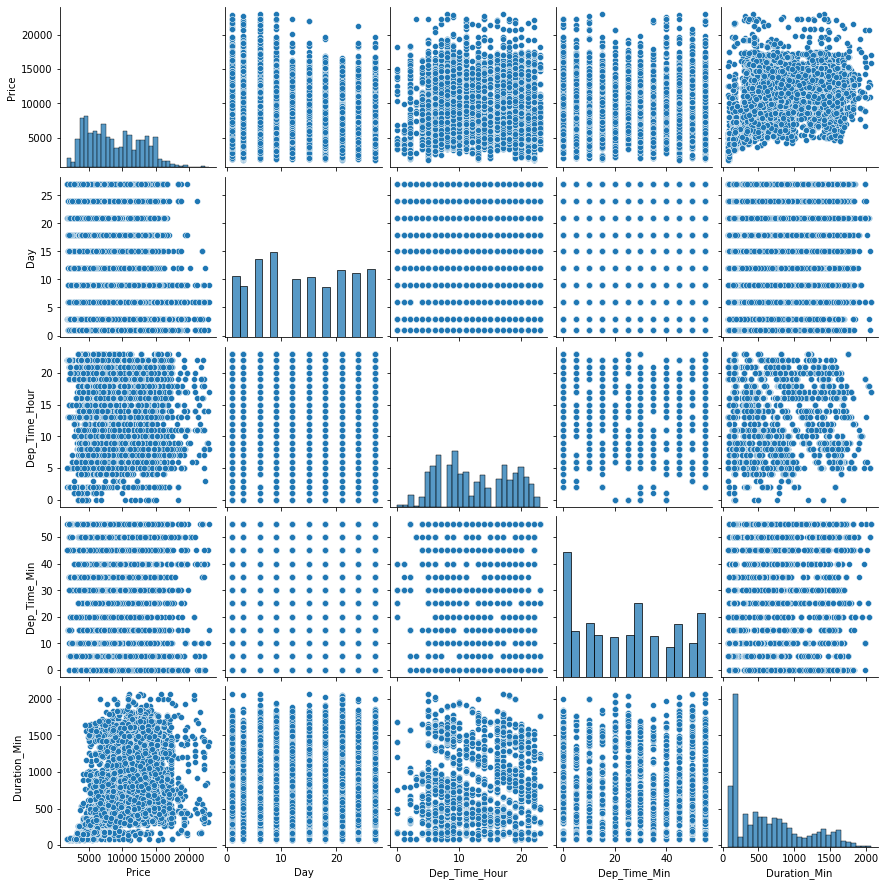

In [22]:
sns.pairplot(data)

In [23]:
data[data["Duration_Min"] > 2000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Season,Dep_Time_Hour,Dep_Time_Min,Duration_Min
470,Jet Airways,Delhi,Cochin,2 stops,No info,13082,21,March,Thursday,Spring,18,20,2045
2571,Air India,Kolkata,Banglore,2 stops,No info,12723,15,May,Wednesday,Spring,5,50,2065
2980,Air India,Kolkata,Banglore,2 stops,No info,10991,1,May,Wednesday,Spring,5,50,2065
3152,Jet Airways,Delhi,Cochin,2 stops,No info,12347,21,March,Thursday,Spring,18,25,2040
3856,Jet Airways,Delhi,Cochin,2 stops,No info,12347,21,March,Thursday,Spring,18,25,2040
4615,Air India,Banglore,New Delhi,2 stops,No info,10835,18,March,Monday,Spring,6,45,2025
5061,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,15812,6,March,Wednesday,Spring,17,55,2070
7626,Jet Airways,Delhi,Cochin,2 stops,No info,20747,3,March,Sunday,Spring,18,20,2045
9190,Jet Airways,Delhi,Cochin,2 stops,No info,17072,6,March,Wednesday,Spring,17,55,2070


<AxesSubplot:xlabel='Season', ylabel='Count'>

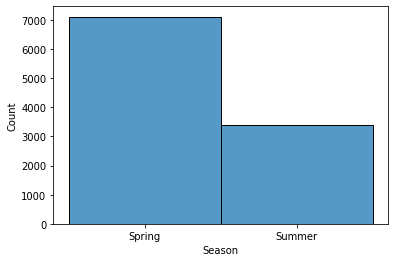

In [24]:
sns.histplot(data=data, x="Season")

<AxesSubplot:xlabel='Month', ylabel='Count'>

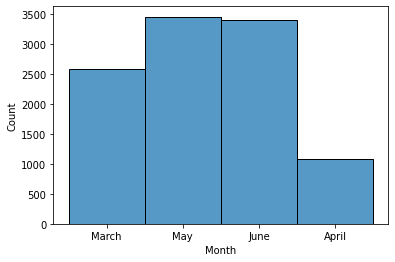

In [25]:
sns.histplot(data=data, x="Month")

<AxesSubplot:xlabel='Weekday', ylabel='Count'>

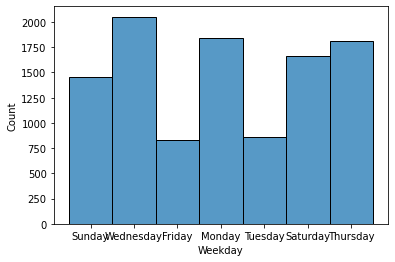

In [26]:
sns.histplot(data=data, x="Weekday")

<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='Count'>

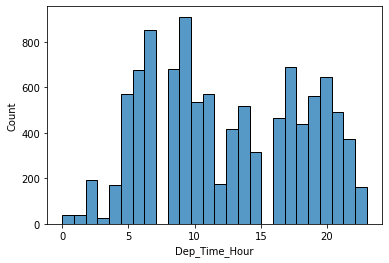

In [27]:
sns.histplot(data=data, x="Dep_Time_Hour")

<AxesSubplot:ylabel='Price'>

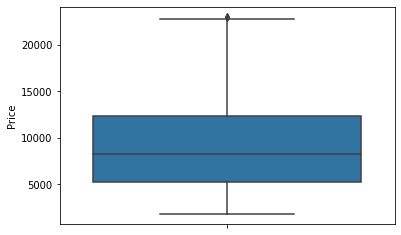

In [28]:
sns.boxplot(data=data, y="Price")

<AxesSubplot:ylabel='Duration_Min'>

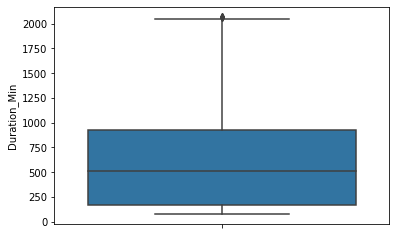

In [29]:
sns.boxplot(data=data, y="Duration_Min")

According to above box plots, `Price` and `Duration` no longer have outliers.

In [30]:
def horizontal_barplot(data , x , y):
    ds = data[[x , y]].groupby([x]).mean().reset_index()
    ds.columns = [x , y]
    ds = ds.sort_values(by=[y] , ascending=False)
    sns.barplot(data = ds , x = y , y = x , orient="horizontal")

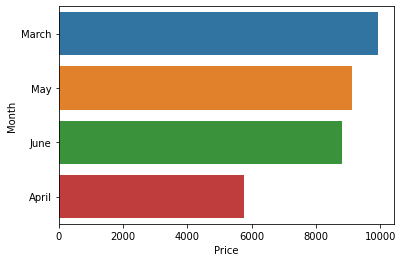

In [31]:
horizontal_barplot(data , x = "Month" , y = "Price")

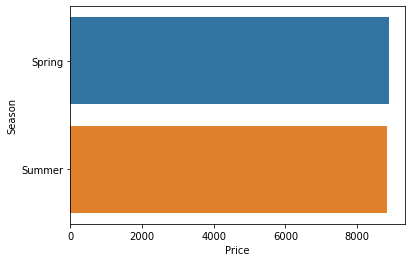

In [32]:
horizontal_barplot(data , x = "Season" , y = "Price")

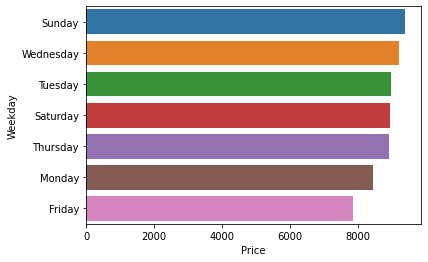

In [33]:
horizontal_barplot(data , x = "Weekday" , y = "Price")

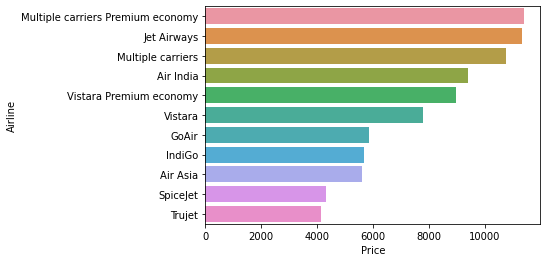

In [34]:
horizontal_barplot(data , x = "Airline" , y = "Price")

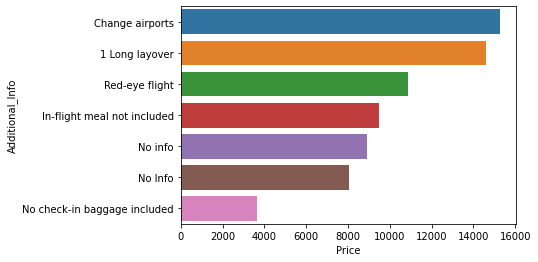

In [35]:
horizontal_barplot(data , x = "Additional_Info" , y = "Price")

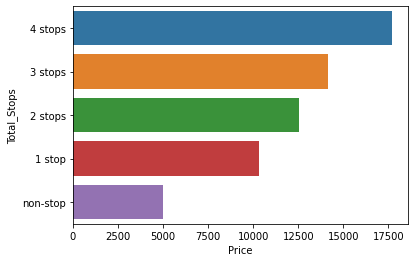

In [36]:
horizontal_barplot(data , x = "Total_Stops" , y = "Price")

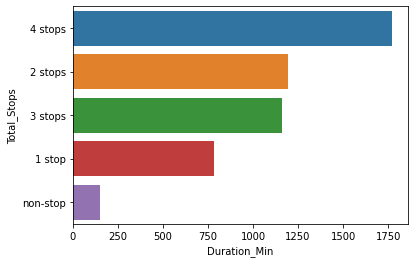

In [37]:
horizontal_barplot(data , x = "Total_Stops" , y = "Duration_Min")

In [38]:
#data.to_csv("data/cleaned_data/cleaned_data.csv")